<a href="https://colab.research.google.com/github/Srayoshi-Mirza/Web_scrapping_practice/blob/main/Web_Scrapping_Static_Website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scrapping the last table from: https://en.wikipedia.org/wiki/Red_states_and_blue_states

We will be using **Beautiful Soup** and **Requests** Library for this Task.

In [2]:
import requests #taking the html from an URl
import bs4 #beautiful soup 4 = bs4 - if we are taking the url by request library then we are using bs4 to find the targetted element
import pandas as pd #store or showing the data in pandas

Imported the two Libraries

In [6]:
url = "https://en.wikipedia.org/wiki/Red_states_and_blue_states"
web_page = bs4.BeautifulSoup(requests.get(url,{}).text, "lxml")
tables = web_page.find_all(name="table", attrs= {"class": "wikitable"})
table_rows = tables[-1].find_all(name="tr")
len(table_rows)

59

requests.get(url,{}).text 
taking the URL from the variable 'url' into the text format
Then taking text url then making it in lxml or tree format

# **What is lxml explained?**
 lxml is a Python library which allows for easy handling of XML and HTML files, and can also be used for web scraping.

In [ ]:
col_names = [raw_name.text.replace("\n","") for raw_name in table_rows[0].find_all(name = "th")]
#col_names

# **The above code is for taking or showing the first row of the table.**
table_rows[0].find_all(name = "th") -> **Selecting the first row by this part**
**'th' every row starts the with th**

'for raw_name in' -> **Itereting loop**

raw_name.text.replace("\n","") -> **Taking the text version of the element, as we saw that there is a \n expression at the end that's why we are replacing that \n expression with "" or nothing**

In [ ]:
content = [raw_name.text.replace("\n","").strip() for raw_name in table_rows[2].find_all(name = "td")]
#content[0].text
content

**We are taking table_rows[2] as we are not taking the contents or text in table_rows[1] position. As the name of contents in the table_rows[2] position starts with td **
strip() -> **Trailing White space remover**
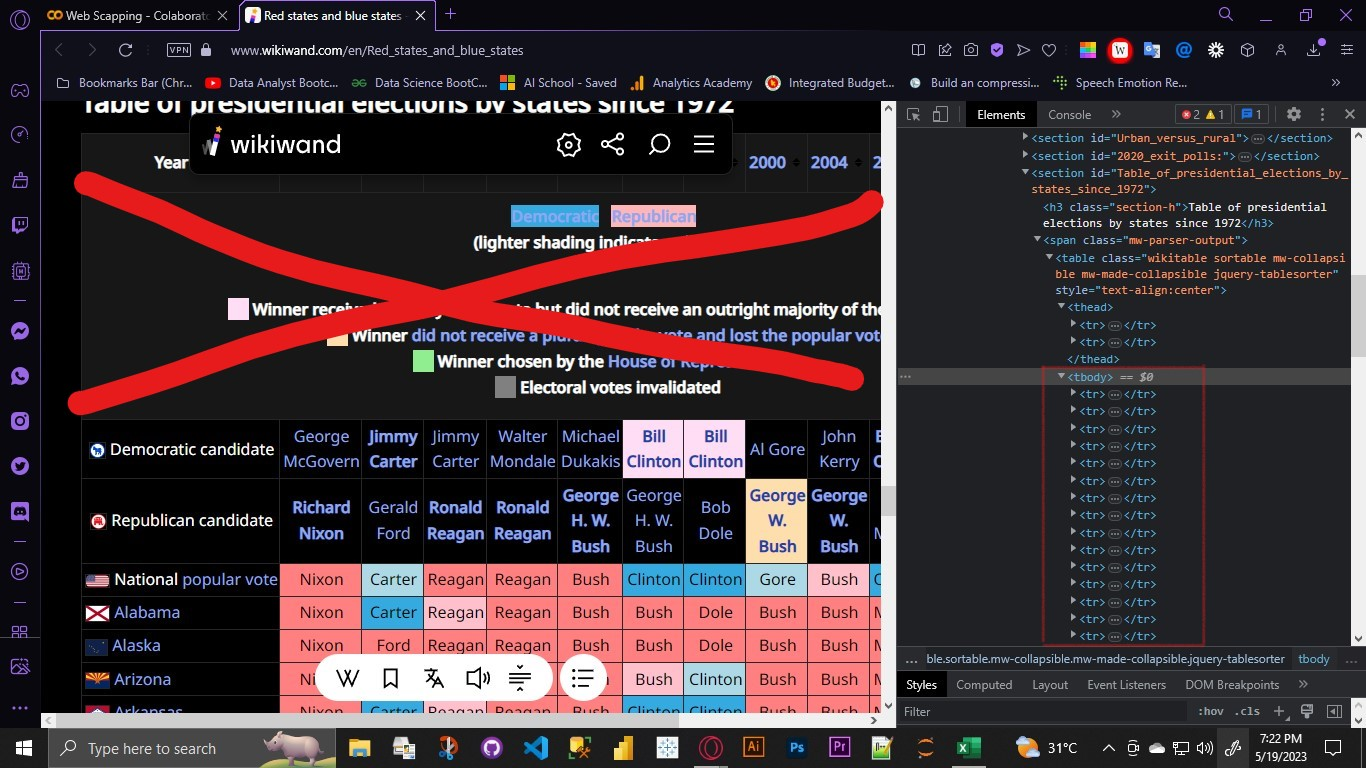

# **Itereting and taking the whole table**

In [14]:
#This was taking as a list
contents = []
for row_id in range(2, len(table_rows)):
  content = [raw_name.text.replace("\n","").strip() for raw_name in table_rows[row_id].find_all(name = "td")]
  contents.append(content)

In [ ]:
contents[-1]

# **Now we want to put the data in a Pandas Data Frame.**
To put it in a Pandas Data Frame
  We need to match the column names with the contents name in the Data Frame

In [16]:
#Taking as a dictionary
contents = []
for row_id in range(2, len(table_rows)):
  content = {col_names[idx]:raw_name.text.replace("\n","").strip() for idx, raw_name in enumerate(table_rows[row_id].find_all(name = "td"))}
  contents.append(content)
  ##########Code Type 1#############

In [ ]:
contents[0]

'col_names[idx]:raw_name.text.replace("\n","").strip() for idx, raw_name in enumerate(table_rows[row_id].find_all(name = "td"))' -> This code is taking the data from the Website table in the Content variable
**bold text**

In [22]:
contents = []
for row_id in range(2, len(table_rows)):
 contents.append({col_names[idx]:raw_name.text.replace("\n","").strip() for idx, raw_name in enumerate(table_rows[row_id].find_all(name = "td"))})
##########Code Type 2#############

In [23]:
contents = [{col_names[idx]:raw_name.text.replace("\n","").strip() for idx, raw_name in enumerate(table_rows[row_id].find_all(name = "td"))} for row_id in range(2, len(table_rows))]
##########Code Type 3#############

**Code Type 1 = Code Type 2 = Code Type 3**

# **Making a Data Frame**

In [27]:
df = pd.DataFrame(data=contents, columns=col_names)
df.head()

,Year,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020
0,Democratic candidate,George McGovern,Jimmy Carter,Jimmy Carter,Walter Mondale,Michael Dukakis,Bill Clinton,Bill Clinton,Al Gore,John Kerry,Barack Obama,Barack Obama,Hillary Clinton,Joe Biden
1,Republican candidate,Richard Nixon,Gerald Ford,Ronald Reagan,Ronald Reagan,George H. W. Bush,George H. W. Bush,Bob Dole,George W. Bush,George W. Bush,John McCain,Mitt Romney,Donald Trump,Donald Trump
2,National popular vote,Nixon,Carter,Reagan,Reagan,Bush,Clinton,Clinton,Gore,Bush,Obama,Obama,Clinton,Biden
3,Alabama,Nixon,Carter,Reagan,Reagan,Bush,Bush,Dole,Bush,Bush,McCain,Romney,Trump,Trump
4,Alaska,Nixon,Ford,Reagan,Reagan,Bush,Bush,Dole,Bush,Bush,McCain,Romney,Trump,Trump


In [29]:
len(df)

57

# **Saving the data into a File**

In [31]:
df.to_csv("G:\Data Science Practice Projects\Practice Data Scrapping.csv")